### Task 1: Introduction and Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import yellowbrick as yb
import matplotlib.pyplot as plt
%matplotlib inline

### Task 2: Load the Classification Data


In [6]:
# Load the classification data set
data=pd.read_csv("occupancy.csv")
data.head()

,datetime,temperature,relative humidity,light,C02,humidity,occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [7]:
# Specify the features of interest
features=["temperature","relative humidity","light","C02","humidity"]
classes=["unoccupied","occupied"]

In [8]:
# Extract the instances and target
X=data[features]
y=data.occupancy

### Task 3: Feature Analysis - Scatter Plot (Got An Error)

In [1]:
#lets start from light co2 to get room is occupied or not. these two are great vis.

#from yellowbrick.contrib.scatter import ScatterVisualizer  again, outdated
# from yellowbrick.contrib import ScatterVisualizer

# visualizer=ScatterVisualizer(x="light",y="C02",classes=classes,size=(800,600))

# visualizer.fit(X,pd.DataFrame(y))
# visualizer.transform(X)
# visualizer.show()

#which features do we use and which features are predictive? again we re trying to pred given room is occupied or unoccupied
#fa with scatterplot is kinda basic approach. scattervisualizer puts 2 features vs each other. and color are assigned accordg
#to the target. this can be used for rship btw pairs of features.

#if u re new to visualizer, and u should if u didnt use ybricks before. in sklearn we have sklearn interface, so estimator is
#sth that learns from the data. and est has few methods, fit, predict. Also transformers are special cases of this estimators
#where instead of making preds they transform the input data. x to xprime for ex. so whats about with ybrick visualizers? are
#they differ from sklearn logic? 

#scattervisualizer is an estimator (in sklearn sense) that visualize based on data (tr data) rather than new dset (test data)
#scattervisualizer not sth that used only by itself. thats imp to notice. where visualizers designed (not just scatter one)
#to used with transformers and estimators in sklearn that give us more info about modelling process.

### Task 4: Feature Analysis - RadViz

In [64]:
#it stds for radial visualization. we will learn what is it about.
from yellowbrick.features.radviz import RadViz

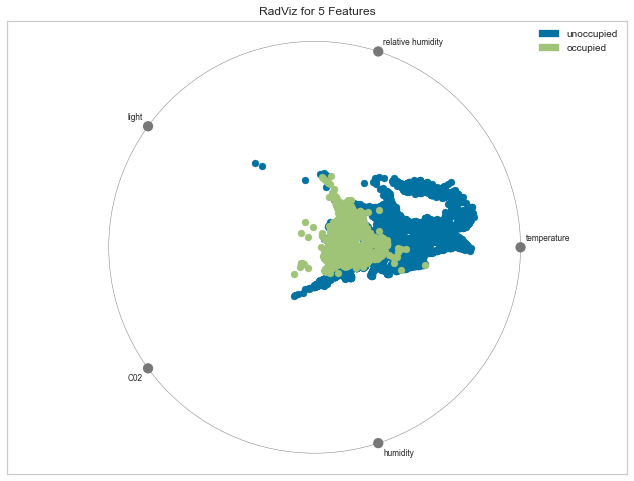

In [67]:
# Instantiate the visualizer
visualizer=RadViz(classes=classes,features=features,size=(800,600))

# Fit the data to the visualizer
visualizer.fit(X,y)

# Transform the data
visualizer.transform(X)

# Draw/show/poof the data
visualizer.poof()

#classes=classes part is for legend and color scheme. our question is binary one. features is X features and its for naming.
#size isnt needed, its optional, but its imp for good plot.

#here are some questions u can answer thx to radviz:
#which features out of this 5 is most predictive
#how hard is it going to be for us to do our classiication problem which is to distinguished btw 2 classes.

#radial viz creates unit circle with features, and features will pull the data classes to them according to their importance
#from this plot we can see that temperature is very predictive.

#also u can check questions like:
#is this data easily separable, how hard is to sep classes based on features we have. from this look we can see that its not
#linearly separable (maybe. maybe algo does a good job, we cant be sure). but we can see that, there is certainly a
#separability btw 2 even though its non-linear.

In [66]:
classes

['unoccupied', 'occupied']

### Task 5: Feature Analysis - Parallel Coordinates Plot


In [69]:
#we could answer questions like:
#determine importance of certain features. (just like prev one)
#and class separability. (just like prev one)

from yellowbrick.features.pcoords import ParallelCoordinates

#parallel coords plot can be used for:
#detect cluster centers of instances that have similary classes.
#or to know features that have high var or dif dist.

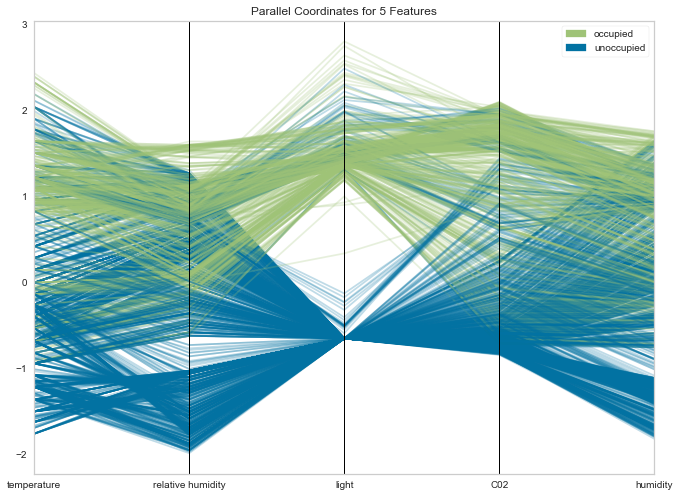

In [70]:
# Instantiate the visualizer
visualizer=ParallelCoordinates(classes=classes,features=features,normalize="standard",sample=0.1,size=(800,600))

# Fit the data to the visualizer
visualizer.fit(X,y)

# Transform the data
visualizer.transform(X)

# Draw/show/poof the data
visualizer.poof()

#"normalize=" is for normalization, it can be directly applied to visualizer without pre transforming the data. there are
#several transformers available to us "standard","minmax","minabs" and even "l1" and "l2" normalization (not regularization)
#to change the perspective of the plot.we will use "standard" one.

#"sample=" is used for taking samples from our data.

#l1: least absolute error, sum(abs(y-ypred)) for best model, l2: least squared error (linreg logic,) sum((y-ypred)^2) to

#so what this vis tells us:
#u can see feature separation, instances are drawn as line segments, and its standardized. we can see that line segments 
#that belongs to unoccupied room has lower light values. if all of the blue lines have low light vals, we can see use light
#col as perfect separation feature.

#unlike from prev scatterplot, where we see clear cut when checking light value (on x axis) we can see here c02 is kinda
#little messy to draw conclusions from. as we talked about it earlier.

#u can check all features in this parallel coord. however, now its time for more systematic approach.

### Task 6: Feature Analysis - Rank Features


In [ ]:
#here is what this tool for:
#are features predictive?
#which features are most imp/predictive?
#do we have good class separability?

#we ll create scatterplot matrices. scatterplot matrices are like bigger versions of rank2d plots. rank2d plots shows more 
#info/detail but problem w rank2d plots is that, they arent scalable. when there are too much features, it cause a problem.

#we re going to do, essentially, create a 2d ranking of features which utilies ranking algo, and we ll check 2 ranking algo;
#covariance ranking algo and pearson ranking algo. they re taking to account pairs of features at a time like a jointplot.
#and pairs of features ranked by their score and visualised using lower-left-triangle of feature co-occurence matrix.

#default ranking algo in this rank2d visualizer is "covariance". covariance (loosely speaking) tries to detect colinear rship
#btw features.

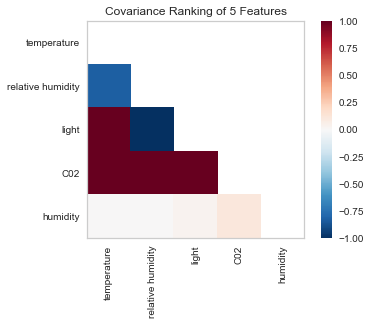

In [71]:
# Instantiate the visualizer with the Covariance ranking algorithm
from yellowbrick.features.rankd import Rank2D

visualizer=Rank2D(features=features,algorithm="covariance")
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.show() # .poof() which one u decide.


#this format is much more compact then what we use in scipy and sklearn which is "scatterplot matrices".however for all cases
#sadly this isnt scaling well w a lot of features.

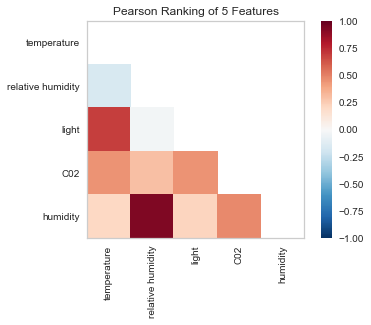

In [72]:
# Instantiate the visualizer with the Pearson ranking algorithm
from yellowbrick.features.rankd import Rank2D

visualizer=Rank2D(features=features,algorithm="pearson")
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.show()

#pearson ranking algo is basically, linear correlation algo to detect colinear rship. now what we check pairwise rship. we
#check colinearity that interfere w the modelling process. if there are high correlations btw 2 features, one can be removed
#i think covariance map is more clear, more bold/darker colours which indicates more rship. strong rship.

### Task 7: Feature Analysis - Manifold Visualization


In [73]:
#this will be last ex. high dim ex could be costly and hard to vis. data must be reduced from nd->2d,3d to lose some portion
#of the info. ez way to accomplish this dim reduction is taking random projection of the data. this approach could be doable
#however randomness is problematic, in random projection more interesting structure within the data will be lost. in ybrick
#we have manifold visualizer that could help us, lets learn how...

#manifold vis, will provide high dim visualization using sth called "manifold learning" that is basically nd->2d and its
#creates a scatterplot and show us 2d structure of the data. unlike other decomposition methods like "pca" and "svd",
#manifold learning generally uses concept of "nearest neighbors" clustering approaches. basically allows model to capture
#non-linear structures in the data, that otherwise will be lost.

#this vis we use, allows us to use all currently available sklearn manifold learning implementations. so we just need to def
#manifold as a string to the visualizer, thats all. this ybrick implementation is very similar to sklearn manifold vis.
#ybrick can use "locally linear","isomaps","spectral" and "tsne" embeddings.

#manifold learning can be used on many instances. on unsupervised learning,clustering problem, just 1 color could be enough,
#to show the structure overlap. In our case, classifciation problem, discrete colors are used for each class. in classifictn
#and clustering problem (us.learning) instances can be described w discrete labels or clusters they belong to.

#manifold learning assign colors to each label and then showing the labels in the legend as well.

from yellowbrick.features.manifold import Manifold

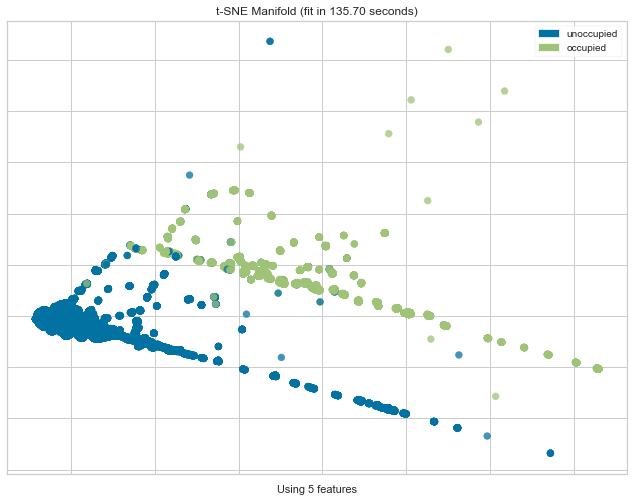

In [76]:
visualizer=Manifold(
            manifold="tsne",
            target="discrete",
            classes=classes,
            size=(800,600))

# visualizer.fit(X,y)
# visualizer.transform(X)
# visualizer.poof() this approach wont work. 

# visualizer.fit(X,y)
# visualizer.transform(X,y) this approach wont work as well.
# visualizer.poof()

visualizer.fit_transform(X,y)
visualizer.poof()

#this vis will take type of manifold as (dif types of embeddings we have as we mentioned earlier) locally linear embeddings, 
#mds, isomaps, tsne. all of them have pros and cons. u should choose one of them as a manifold

#target=discrete means, its either 0 or 1, unoccupied, occupied. classes=classes is for legends.


#couple important points before running this algo,our dset is very tiny, less than 1mb and even with this data it takes mins,
#so u should do this steps:
#1.scale yr data prevly.standardscaler could be one, scaled data is faster to process.
#2.sample yr instances,train_test_split with stratify could be good.
#3.filter features to decrease sparsity in yr dset.
#4.u can use selectkbest w chi2 for ex to select only ver imp features, this will decrease computation time as well.

## Model Selection and Evaluation

### Task 8: ROC/AUC Plots


In [9]:
# Create the train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

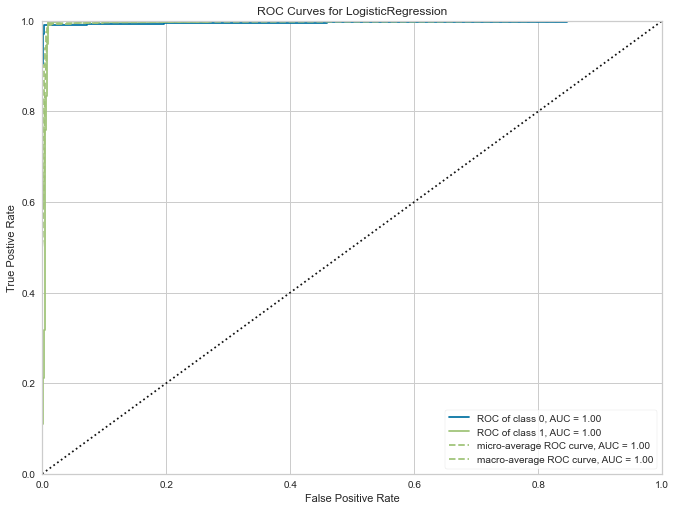

In [10]:
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression

# Instantiate the classification model and visualizer
visualizer=ROCAUC(LogisticRegression(),size=(800,600))
# Fit the training data to the visualizer
visualizer.fit(X_train,y_train)
# Evaluate the model on the test data
visualizer.score(X_test,y_test)
# Draw/show/poof the data
visualizer.poof()
#or visualizer.show()

### Task 9: Classification Report and Confusion Matrix


In [11]:
from yellowbrick.classifier import ClassificationReport

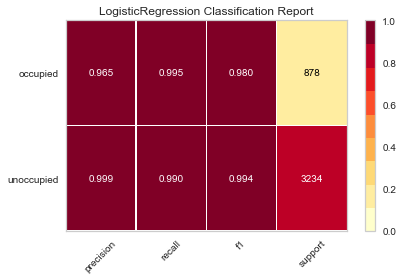

In [12]:
visualizer=ClassificationReport(LogisticRegression(),classes=classes,support=True)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

In [14]:
from yellowbrick.classifier import ConfusionMatrix

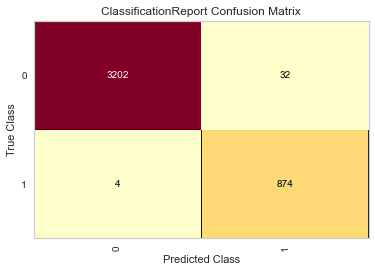

In [15]:
cm=ConfusionMatrix(visualizer,classes=[0,1])
cm.score(X_test,y_test)
cm.poof()

### Task 10: Cross Validation Scores

In [17]:
#what is our problem is an regression problem, how can we check, precision,recall,f1,conf matrix in that situation? here
#is one good way to evaluate reg model perf.(with the help of r2 and mse,mae etc)

#on real world data, data can be dist unevenly, thats where cross_val comes into play. here is how cross_val works.
#it takes yr data and shuffles it (to get it rid of sampling bias chance) then splits the data into kfolds.
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores

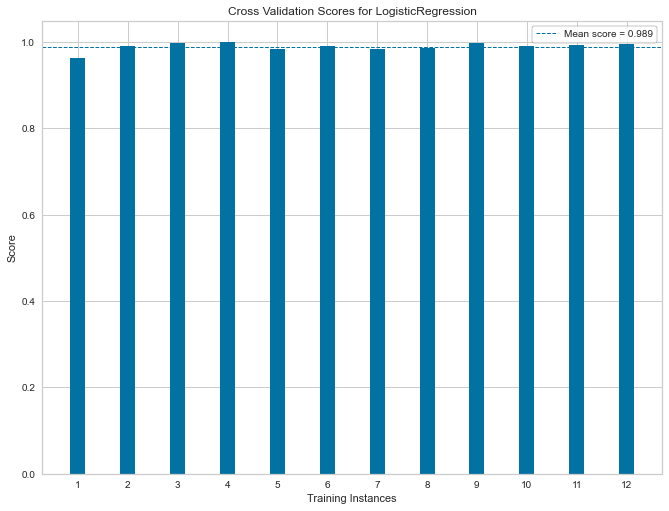

In [18]:
# Create a new figure and axes
_,ax=plt.subplots()
# Create a cross-validation strategy
cv=StratifiedKFold(12)
# Create the CV score visualizer
oz=CVScores(LogisticRegression(),ax=ax,cv=cv,scoring="f1_weighted",size=(800,600))

oz.fit(X,y)
oz.show()

### Task 11: Evaluating Class Balance

In [19]:
#ez vis in yellowbrick to let u know if there is any class imbalance on yr dset. what should i do? oversampling,undersampling
#ensemble models (models w class weights) or stratifiedsampling etc.
from yellowbrick.classifier import ClassBalance

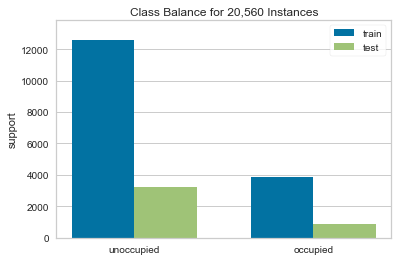

In [20]:
visualizer=ClassBalance(labels=classes)
visualizer.fit(y_train,y_test)
visualizer.poof()

#several class imbalance problems could be MASKED by good f1 score, which is why u cant use f1score as a metric, just by
#itself and accuracy_scores. in that examples, classifier generally guess majority class and gets no problem overall with
#no minority class guess.

#this classbalance tool is a quick check that shows u "are majority/minority ratios same for both train and test split? "

### Task 12: Discrimination Threshold for Logistic Regression


In [21]:
#best tool on last ex, discrimination threshold for binary classifiers.
#dc threshold: prob that + class is chosen over the - class. generally this is set to %50. but threshold can be adjusted to
#increase/decrease sensitivity/fpr or other metrics precision/recall etc. Lets see visual to understand better.

from yellowbrick.classifier import DiscriminationThreshold

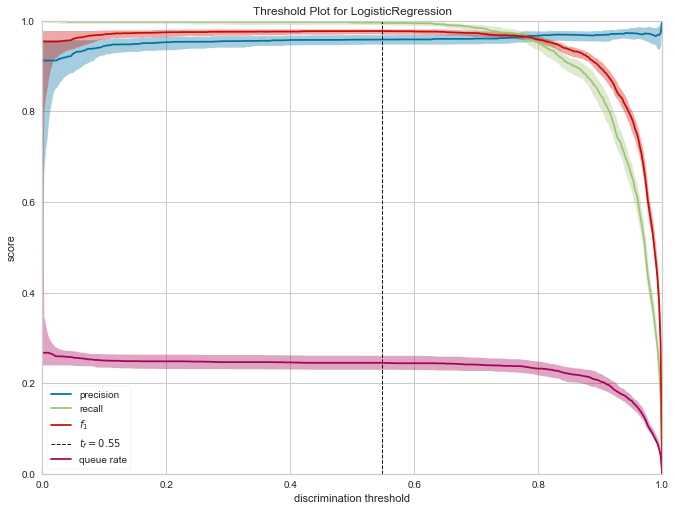

In [22]:
visualizer=DiscriminationThreshold(LogisticRegression(),size=(800,600))
visualizer.fit(X_train,y_train)
visualizer.poof()

#plot is kinda different looking, lets investigate.various vals of discrimination threshold from 0 to 1 are specified on X.
#default value of X is %50 (0.5). y axis has scores for dif metrics, now u can see for dif logreg thresholds, u can see pre
#recall f1 and queue rate (??). So if u care more about precision u can set yr threshold to 0.8  or if u care more about
#recall u could set it to 0.2 etc.

#our ex is not the best example for testing this tool, ham/spam dset could be better